# 1. FEM con solución conocida y gráfico de la solución.

Resolvemos el problema:

$$
-\Delta u = f, \quad \text{en } \Omega = (0, 1)\times (0, 1)\\
u = 0, \quad \text{sobre } \partial \Omega
$$

con una discretización de elementos finitos con funciones continuas y lineales 
a trozos. Primero, discretizamos el dominio con triángulos de la siguiente 
forma:

C:\Users\sfsta\AppData\Local\Temp\ipykernel_16508\1550536716.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


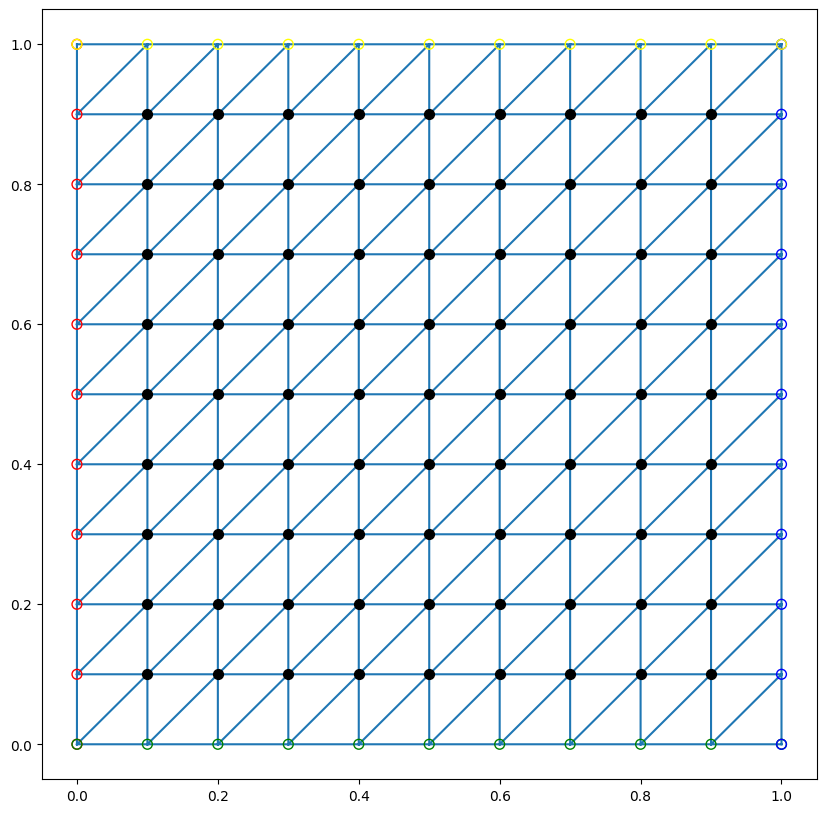

In [1]:
%matplotlib inline
import numpy as np
from vmesh import from_coords

"""
Allowed element types:
- crisscross
- unionjack
- triangle_left
- triangle_right
- rectangle
"""

coords = (0, 1, 0, 1)
ndx, ndy = 10, 10
mesh = from_coords(ndx, ndy, coords, el_type="triangle_right")
fig, ax = mesh.plot_mesh(fp=500)
fig.show()

Continuamos instanciando el modelo y generando la solución. Utilizamos 

$$
f(x, y) = 2\pi^2\sin(\pi x)\sin(\pi y)
$$

De esta forma la solución es conocida $u(x, y) = \sin(\pi x)\sin(\pi y)$

In [2]:
from meshio import write_points_cells

def save_plot(path, mesh, u):
    el_dict = {}
    for key in mesh.IEN.keys():
        if key == "rectangle":
            el_dict["quad"] = mesh.IEN["rectangle"]
        elif key in mesh.triangle_el_types:
            if "triangle" in el_dict.keys():
                nIEN = np.concatenate(
                    (el_dict["triangle"], mesh.IEN[key]), 
                    axis=0
                )
                el_dict["triangle"] = nIEN
            else:
                el_dict["triangle"] = mesh.IEN[key]
    write_points_cells(f"{path}.vtk", mesh.xyz, el_dict, {"disp": u})

In [3]:
import numpy as np
from problems import PoissonProblem
from solvers import LinearFEMSolver
import scipy.sparse.linalg as spsl

# problem generation
ndx, ndy = 100, 100
coords = (0, 1, 0, 1)
f = lambda x, y: (2*np.pi**2)*np.sin(np.pi*x)*np.sin(np.pi*y)
problem = PoissonProblem(f=f, k=0, coords=coords)
mesh = from_coords(ndx, ndy, coords)
solver = LinearFEMSolver(problem, mesh)

# mass and stifness matrices
M, S, b = solver.model()
m, n = S.shape
x = spsl.spsolve(M-S, b)
x = solver.extended_sol(x)
save_plot("poisson_sol_exact", mesh, x)

Warning: VTK requires 3D points, but 2D points given. Appending 0 third component.

# Precondicionadores

Veremos cómo se comportan los métodos de Gradientes Conjugados y GMRES 
precondicionados. Recordar que para precondicionar Gradientes Conjugados, el 
precondicionador también debe ser simétrico y definido positivo. Primero, para 
el caso de CG implementamos directamente el algoritmo precondicionado.

In [4]:
def PCG(A, M_inv, b, x0, j_max=1000, tol=1e-10):
    # why not... try scipy's implementation as well!!
    """
    Implementation of preconditioned conjugate gradients.
    https://www.cse.psu.edu/~b58/cse456/lecture20.pdf
    """
    # :P 
    return xj, errs

In [5]:
import scipy.sparse.linalg as spsl
import scipy.sparse as sps
# return matrix or function????????!?!?!?
def Jacobi_pre(A):
    D = A.diagonal()
    min_inv = sps.diags(1/D, 0)
    def M_inv(b):
        return (1/D)*b
    return M_inv
M_inv = Jacobi_pre(A)
M_inv = M_inv(x)


def null_pre(A):
    return M_inv

def SSOR(A, w):
    return M_inv

# Tests problema 1:

In [6]:
import numpy as np
import scipy.sparse.linalg as spsl
from problems import PoissonProblem
from vmesh import from_coords
from solvers import LinearFEMSolver

# problem generation
ndx, ndy = 100, 100
coords = (0, 1, 0, 1)
f = lambda x, y: (2*np.pi**2)*np.sin(np.pi*x)*np.sin(np.pi*y)
problem = None
mesh = None
solver = LinearFEMSolver(problem, mesh)

# mass and stifness matrices
M, S, b = solver.model()
m, n = S.shape

A = -M+S
b = -b
M_inv = None
# rellenar
x0 = np.zeros(n)

xj, errsJ = PCG(A, M_inv, b, x0, j_max=1000, tol=1e-10)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(errsJ, label="Jacobi")
ax.plot(errs, label="none")
ax.plot(errsSGS, label="SGS")
ax.plot(errsSSOR, label="SSOR")

ax.set_yscale("log")
ax.legend()

AttributeError: 'NoneType' object has no attribute 'model'

Cuánto demora en alcanzar una tolerancia fija?

In [ ]:
import numpy as np
import scipy.sparse.linalg as spsl
from problems import PoissonProblem
from vmesh import from_coords
from solvers import LinearFEMSolver
from tqdm import tqdm

NN = None
tol = None
niters_none = []
niters_jacobi = []
niters_sgs = []
niters_ssor = []
# rellenar

# Y cómo usamos gmres?

In [ ]:
from scipy.sparse.linalg import LinearOperator

class gmres_counter:
    
    def __init__(self, disp=True):
        self.niter = 0
        self.callbacks = [1]
        self._disp = disp
        
    
    def __call__(self, value):
        self.niter += 1
        self.callbacks.append(value)
        if self._disp:
            print(value)

class SGSPrecond(LinearOperator):

    def __init__(self, A):
        pass

    def _matvec(self, x):
        # regalito porque necesitan esto para que funcione
        I = sps.eye(self.D.shape[0])
        z = spsl.spsolve_triangular(I-self.E.dot(self.Dm1), x, lower=True)
        w = spsl.spsolve_triangular(self.D - self.F, z, lower=False)
        return w

    @property
    def shape(self):
        return self.D.shape

    @property
    def dtype(self):
        return self.D.dtype

In [ ]:
import numpy as np
import scipy.sparse.linalg as spsl
from problems import PoissonProblem
from vmesh import from_coords
from solvers import LinearFEMSolver

# problem generation
ndx, ndy = 100, 100
coords = (0, 1, 0, 1)
f = lambda x, y: (2*np.pi**2)*np.sin(np.pi*x)*np.sin(np.pi*y)
problem = None
mesh = None
solver = None

# mass and stifness matrices
M, S, b = None, None, None
m, n = None

A = M-S

# generate counters and plots for none en preconditioned
